<p style="font-family: Arial; font-size:2em;color:purple; font-style:bold"><br>
RANDOM FOREST CLASSIFIER
</p><br>

We are going to build a model on the iris flower dataset, which is a very famous classification set. It comprises the sepal
length, sepal width, petal length, petal width and type of flowers. There are three species or classes: setosa, versicolor 
and virginia. We will buitld a model to classify the type of flower.

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()

In [5]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [3]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# First, we separate the columns into dependent and independent variables (or features and labels). 
# Then you split those variables into a training and test set.

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [9]:
# Now we will train the model on the training set and perform predictions on the test set.

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(X_train,y_train)

# Set the prediction based on the training
y_pred=clf.predict(X_test)



In [10]:
# After training, check the accuracy using actual and predicted values.

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [11]:
# We can also make a prediction for a single item, for example:

clf.predict([[3, 5, 4, 2]])

array([2])


Here, we are finding important features or selecting features in the IRIS dataset. 
In scikit-learn, we can perform this task in the following steps:

- First, we need to create a random forests model.
- Second, we the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.


In [13]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.453725
petal length (cm)    0.427542
sepal length (cm)    0.096032
sepal width (cm)     0.022702
dtype: float64

No handles with labels found to put in legend.


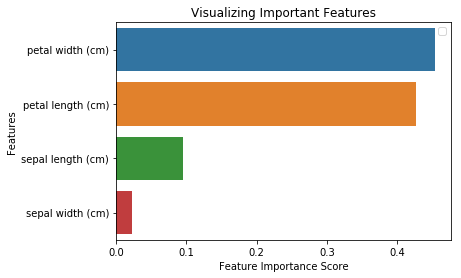

In [15]:
# We can also visualize the feature importance. Visualizations are easy to understand and interpretable.
# For visualization, you can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, 
# it offers a number of customized themes and provides additional plot types. 
# Matplotlib is a superset of seaborn and both are equally important for good visualizations.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [17]:
# We are going to remove the 'sepal width' because it has very low importance

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']              

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) # 70% training and 30% test

In [18]:
# Now we will generate a model on the selected training set features, perform predictions on the selected test set features, 
# and compare actual and predicted values.

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333
